### Create final combined dataset

As all the data are now available, the model will need a combined single dataset with all the features to train.

Initially, each dataset must be analysed to see if the features available do have an impact on the price to be predicted. If not, the features can be excluded when creating the final dataset, as it is at that point, only additional noise that has no real impact.

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
TRENDS_DATA = '../../data/GTrends/BTC_GTrends_total_cleaned.csv'
TWEETS_DATA = '../../data/Tweets/BTC_Tweet_Sentiment_Unweighed.csv'
TWEET_VOLUME_DATA = '../../data/Tweets/BTC_Tweet_Volume.csv'
BLOCK_REWARD_DATA = '../../data/BTC_Block_Reward.csv'
BTC_PRICES_DATA = '../../data/BTC_Prices.csv'

### Analyze prices dataset

In [3]:
historical_prices = pd.read_csv(BTC_PRICES_DATA)
historical_prices.head()

,date,volume,close,open,max,min,change_percent
0,2014-01-01,10757,815.940002,805.940002,829.929993,770.969971,1.240787
1,2014-01-02,12812,856.909973,815.940002,886.210022,810.469971,5.021199
2,2014-01-03,9709,884.260010,856.909973,888.229980,839.440002,3.191705
3,2014-01-04,14239,924.690002,884.260010,932.159973,848.320007,4.572184
4,2014-01-05,21374,1014.739990,924.690002,1029.859985,911.359985,9.738397


In [4]:
closing_price = historical_prices['close']
closing_price[:10]

0     815.940002
1     856.909973
2     884.260010
3     924.690002
4    1014.739990
5    1012.650024
6     879.900024
7     938.840027
8     936.950012
9     957.760010
Name: close, dtype: float64

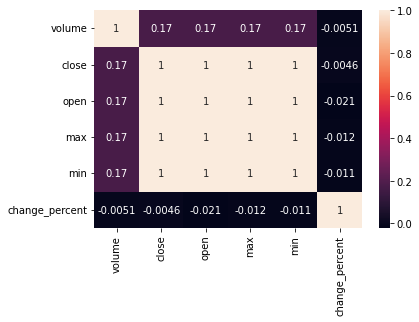

In [12]:
# Check correlation
sns.heatmap(historical_prices.corr(), annot=True)
plt.show()

In [5]:
# Due to the large correlation of variables and closing price: max, min, open can be dropped
historical_prices.drop(['max', 'min', 'open'], axis=1, inplace=True)
historical_prices.head()

,date,volume,close,change_percent
0,2014-01-01,10757,815.940002,1.240787
1,2014-01-02,12812,856.909973,5.021199
2,2014-01-03,9709,884.260010,3.191705
3,2014-01-04,14239,924.690002,4.572184
4,2014-01-05,21374,1014.739990,9.738397


As the `max, min, open` features are highly correlated, they are dropped. The `volume` and `change_percent` features can remain as they aren't.

### Analyze Twitter volume dataset

In [6]:
twitter_volume = pd.read_csv(TWEET_VOLUME_DATA)
twitter_volume.head()

,Unnamed: 0,Date,Tweet Volume
0,0,2014/04/09,8193.0
1,1,2014/04/10,15039.0
2,2,2014/04/11,14907.0
3,3,2014/04/12,7582.0
4,4,2014/04/13,10674.0


In [7]:
twitter_volume.drop(['Unnamed: 0'], axis=1, inplace=True)
twitter_volume.head()

,Date,Tweet Volume
0,2014/04/09,8193.0
1,2014/04/10,15039.0
2,2014/04/11,14907.0
3,2014/04/12,7582.0
4,2014/04/13,10674.0


In [8]:
twitter_volume.tail()

,Date,Tweet Volume
3208,2023/01/20,135671.0
3209,2023/01/21,134571.0
3210,2023/01/22,109526.0
3211,2023/01/23,160357.0
3212,2023/01/24,11741.0


In [9]:
historical_prices.tail()

,date,volume,close,change_percent
3306,2023-01-20,373735,22677.236328,7.570983
3307,2023-01-21,382688,22775.677734,0.434098
3308,2023-01-22,280644,22707.761719,-0.298195
3309,2023-01-23,327850,22915.494141,0.914808
3310,2023-01-24,333356,23071.386719,0.680293


In [10]:
filtered_prices = historical_prices[~(historical_prices['date'] < '2015-01-01')]

In [80]:
# Check for any null values
filtered_prices.isnull().sum()

date              0
volume            0
close             0
change_percent    0
dtype: int64

In [11]:
filtered_prices.head()

,date,volume,close,change_percent
365,2015-01-01,12820,314.890015,-1.052657
366,2015-01-02,14729,315.209991,0.101615
367,2015-01-03,47366,287.130005,-8.908343
368,2015-01-04,88769,264.720001,-7.804828
369,2015-01-05,54993,274.839996,3.822905


In [12]:
filtered_prices.tail()

,date,volume,close,change_percent
3306,2023-01-20,373735,22677.236328,7.570983
3307,2023-01-21,382688,22775.677734,0.434098
3308,2023-01-22,280644,22707.761719,-0.298195
3309,2023-01-23,327850,22915.494141,0.914808
3310,2023-01-24,333356,23071.386719,0.680293


In [13]:
filtered_t_volume = twitter_volume[~(twitter_volume['Date'] < '2015-01-01')]

In [14]:
filtered_t_volume.head()

,Date,Tweet Volume
267,2015/01/01,18681.0
268,2015/01/02,9385.0
269,2015/01/03,NaN
270,2015/01/04,7300.0
271,2015/01/05,23092.0


In [15]:
filtered_t_volume.tail()

,Date,Tweet Volume
3208,2023/01/20,135671.0
3209,2023/01/21,134571.0
3210,2023/01/22,109526.0
3211,2023/01/23,160357.0
3212,2023/01/24,11741.0


In [16]:
# Check for any null values
filtered_t_volume.isnull().sum()

Date             0
Tweet Volume    56
dtype: int64

In [17]:
# Since null values are few, the average can be imputed
filtered_t_volume['Tweet Volume'] = filtered_t_volume['Tweet Volume'].fillna(filtered_t_volume['Tweet Volume'].mean())

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
# Check for any null values
filtered_t_volume.isnull().sum()

Date            0
Tweet Volume    0
dtype: int64

In [19]:
filtered_t_volume['close'] = list(filtered_prices['close'])

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
filtered_t_volume.head()

,Date,Tweet Volume,close
267,2015/01/01,18681.0000,314.890015
268,2015/01/02,9385.0000,315.209991
269,2015/01/03,57542.1391,287.130005
270,2015/01/04,7300.0000,264.720001
271,2015/01/05,23092.0000,274.839996


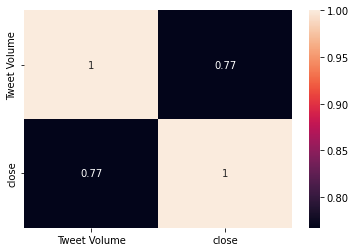

In [21]:
# Check correlation
sns.heatmap(filtered_t_volume.corr(), annot=True)
plt.show()

As there is no high correlation, `twitter volume` can be considered. (Usually, features with a correlation value of greater than `0.95` are dropped)

### Analyze block reward dataset

In [138]:
block_reward = pd.read_csv(BLOCK_REWARD_DATA)
block_reward.head()

,Unnamed: 0,Date,Block Reward Size
0,0,2010/07/17,0.00100
1,1,2010/07/18,0.01630
2,2,2010/07/19,0.00154
3,3,2010/07/20,NaN
4,4,2010/07/21,NaN


In [139]:
block_reward.drop(['Unnamed: 0'], axis=1, inplace=True)

In [140]:
block_reward.tail()

,Date,Block Reward Size
4569,2023/01/19,1.760
4570,2023/01/20,2.317
4571,2023/01/21,1.859
4572,2023/01/22,1.438
4573,2023/01/23,1.490


In [141]:
filtered_block_reward = block_reward[~(block_reward['Date'] < '2015-01-01')]

In [142]:
# For this dataset, the latest date is usually available only the following date. Therefore, add column avg value as following
# date's reward
append_br = pd.DataFrame({
    'Date': filtered_prices.tail(1)['date'].values[0],
    'Block Reward Size': block_reward['Block Reward Size'].mean()
}, index=[len(block_reward)])

In [143]:
filtered_block_reward = filtered_block_reward.append(append_br)

In [144]:
# Check for any null values
filtered_block_reward.isnull().sum()

Date                 0
Block Reward Size    0
dtype: int64

In [29]:
filtered_block_reward['close'] = list(filtered_prices['close'])

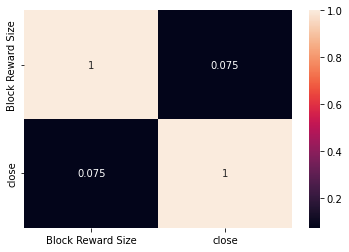

In [30]:
# Check correlation
sns.heatmap(filtered_block_reward.corr(), annot=True)
plt.show()

As there is no high correlation, `block reward size` can also be considered

### Analyze google trends dataset

In [31]:
gtrends = pd.read_csv(TRENDS_DATA)
gtrends.head()

,date,bitcoin_unscaled
0,2014-01-01,46
1,2014-01-02,50
2,2014-01-03,52
3,2014-01-04,45
4,2014-01-05,52


In [32]:
gtrends.tail()

,date,bitcoin_unscaled
3306,2023-01-20,61
3307,2023-01-21,67
3308,2023-01-22,51
3309,2023-01-23,64
3310,2023-01-24,58


In [33]:
# Certain issues popup
filtered_gtrends = gtrends[~(pd.to_datetime(gtrends['date']) < pd.to_datetime('2015-01-01'))]

In [34]:
# Check for any null values
filtered_gtrends.isnull().sum()

date                0
bitcoin_unscaled    0
dtype: int64

In [35]:
len(filtered_gtrends)

2946

In [36]:
filtered_gtrends['close'] = list(filtered_prices['close'])

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


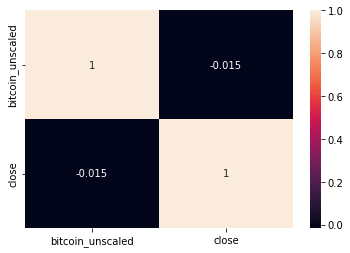

In [37]:
# Check correlation
sns.heatmap(filtered_gtrends.corr(), annot=True)
plt.show()

As there is no high correlation, `google trends` can also be considered

### Analyze twitter sentiment dataset

In [38]:
twitter_sentiments = pd.read_csv(TWEETS_DATA)
twitter_sentiments.head()

,Unnamed: 0,date,negative_score,neutral_score,positive_score,compound_score
0,0,2014-01-02,0.017968,0.914406,0.067656,0.153433
1,1,2014-01-03,0.018168,0.909010,0.072842,0.173104
2,2,2014-01-04,0.013678,0.914156,0.072176,0.184717
3,3,2014-01-05,0.019852,0.913508,0.066670,0.148632
4,4,2014-01-06,0.018818,0.913644,0.067562,0.154831


In [39]:
twitter_sentiments.tail()

,Unnamed: 0,date,negative_score,neutral_score,positive_score,compound_score
3301,3301,2023-01-20,0.043291,0.882784,0.073932,0.088555
3302,3302,2023-01-21,0.040826,0.889545,0.069621,0.076624
3303,3303,2023-01-22,0.038890,0.902008,0.059120,0.067227
3304,0,2023-01-23,0.038507,0.898695,0.062778,0.070769
3305,0,2023-01-24,0.029701,0.908082,0.062210,0.087760


In [40]:
# As the compound column is a combination of the other scores, they can be removed
twitter_sentiments.drop(['Unnamed: 0', 'negative_score', 'neutral_score', 'positive_score'], axis=1, inplace=True)

In [41]:
twitter_sentiments.head()

,date,compound_score
0,2014-01-02,0.153433
1,2014-01-03,0.173104
2,2014-01-04,0.184717
3,2014-01-05,0.148632
4,2014-01-06,0.154831


In [42]:
# Check for any null values
twitter_sentiments.isnull().sum()

date              0
compound_score    0
dtype: int64

In [43]:
filtered_twitter_sentiments = twitter_sentiments[~(twitter_sentiments['date'] < '2015-01-01')]

In [44]:
filtered_twitter_sentiments['close'] = list(filtered_prices['close'])

ValueError: Length of values (2946) does not match length of index (2942)

Certain dates had no tweets.

**This would be a common issue for all datasets. Therefore, the mean value will have to be imputed.**

As at this stage we are only checking for which features to use, creating the combined dataset isn't the priority right now.

In [45]:
tw_dates = list(filtered_twitter_sentiments['date'])
pr_dates = list(filtered_prices['date'])

len(tw_dates), len(pr_dates)

(2942, 2946)

In [46]:
missing_days = [day for day in pr_dates if day not in tw_dates]
missing_days

['2023-01-08', '2023-01-09', '2023-01-10', '2023-01-11']

In [47]:
# Remove the above rows from prices
tweet_prices = filtered_prices[~(filtered_prices['date'] == missing_days[0])]
tweet_prices = tweet_prices[~(tweet_prices['date'] == missing_days[1])]
tweet_prices = tweet_prices[~(tweet_prices['date'] == missing_days[2])]
tweet_prices = tweet_prices[~(tweet_prices['date'] == missing_days[3])]

In [48]:
len(tweet_prices)

2942

In [49]:
filtered_twitter_sentiments['close'] = list(tweet_prices['close'])

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


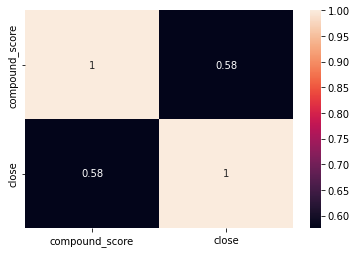

In [50]:
# Check correlation
sns.heatmap(filtered_twitter_sentiments.corr(), annot=True)
plt.show()

As there is no high correlation, `twitter sentiment` can also be considered

### Create final dataset

In [92]:
filtered_prices = historical_prices[~(historical_prices['date'] < '2015-01-01')]
filtered_t_volume = twitter_volume[~(twitter_volume['Date'] < '2015-01-01')]
filtered_block_reward = block_reward[~(block_reward['Date'] < '2015-01-01')]
filtered_gtrends = gtrends[~(gtrends['date'] < '2015-01-01')]
filtered_twitter_sentiments = twitter_sentiments[~(twitter_sentiments['date'] < '2015-01-01')]

**Combine columns into prices dataset**

In [57]:
import copy

In [58]:
combined_df = copy.deepcopy(filtered_prices)

In [64]:
combined_df['block reward'] = list(filtered_block_reward['Block Reward Size'])

In [65]:
combined_df.head()

,date,volume,close,change_percent,block reward
365,2015-01-01,12820,314.890015,-1.052657,0.195
366,2015-01-02,14729,315.209991,0.101615,0.286
367,2015-01-03,47366,287.130005,-8.908343,0.291
368,2015-01-04,88769,264.720001,-7.804828,0.504
369,2015-01-05,54993,274.839996,3.822905,0.412


In [66]:
combined_df['twitter volume'] = list(filtered_t_volume['Tweet Volume'])

In [67]:
combined_df['bitcoin unscaled'] = list(filtered_gtrends['bitcoin_unscaled'])

In [68]:
combined_df['sentiment'] = list(filtered_twitter_sentiments['compound_score'])

ValueError: Length of values (2942) does not match length of index (2946)

In [70]:
combined_df.head()

,date,volume,close,change_percent,block reward,twitter volume,bitcoin unscaled
365,2015-01-01,12820,314.890015,-1.052657,0.195,18681.0000,48
366,2015-01-02,14729,315.209991,0.101615,0.286,9385.0000,47
367,2015-01-03,47366,287.130005,-8.908343,0.291,57542.1391,51
368,2015-01-04,88769,264.720001,-7.804828,0.504,7300.0000,67
369,2015-01-05,54993,274.839996,3.822905,0.412,23092.0000,73


In [71]:
filtered_twitter_sentiments.head()

,date,compound_score,close
364,2015-01-01,0.129292,314.890015
365,2015-01-02,0.172895,315.209991
366,2015-01-03,0.160714,287.130005
367,2015-01-04,0.160599,264.720001
368,2015-01-05,0.186722,274.839996


In [72]:
filtered_twitter_sentiments_ = filtered_twitter_sentiments.drop(['close'], axis=1)
filtered_twitter_sentiments_.head()

,date,compound_score
364,2015-01-01,0.129292
365,2015-01-02,0.172895
366,2015-01-03,0.160714
367,2015-01-04,0.160599
368,2015-01-05,0.186722


There are missing dates. We need to find a way to add NaN into those missing date rows

In [80]:
# A left outer join can be performed for such instances
pd.merge(
    combined_df,
    filtered_twitter_sentiments_,
    on=['date'],
    how='left'
)

,date,volume,close,change_percent,block reward,twitter volume,bitcoin unscaled,compound_score
0,2015-01-01,12820,314.890015,-1.052657,0.195000,18681.0000,48,0.129292
1,2015-01-02,14729,315.209991,0.101615,0.286000,9385.0000,47,0.172895
2,2015-01-03,47366,287.130005,-8.908343,0.291000,57542.1391,51,0.160714
3,2015-01-04,88769,264.720001,-7.804828,0.504000,7300.0000,67,0.160599
4,2015-01-05,54993,274.839996,3.822905,0.412000,23092.0000,73,0.186722
...,...,...,...,...,...,...,...,...
2941,2023-01-20,373735,22677.236328,7.570983,2.317000,135671.0000,61,0.088555
2942,2023-01-21,382688,22775.677734,0.434098,1.859000,134571.0000,67,0.076624
2943,2023-01-22,280644,22707.761719,-0.298195,1.438000,109526.0000,51,0.067227
2944,2023-01-23,327850,22915.494141,0.914808,1.490000,160357.0000,64,0.070769


It's best to do the above for all the exogenous features as they would not contain values for each date, as above.

**Join dataframes**

In [172]:
TRENDS_DATA = '../../data/GTrends/BTC_GTrends_total_cleaned.csv'
TWEETS_DATA = '../../data/Tweets/BTC_Tweet_Sentiment_Unweighed.csv'
TWEET_VOLUME_DATA = '../../data/Tweets/BTC_Tweet_Volume.csv'
BLOCK_REWARD_DATA = '../../data/BTC_Block_Reward.csv'
BTC_PRICES_DATA = '../../data/BTC_Prices.csv'

In [173]:
historical_prices = pd.read_csv(BTC_PRICES_DATA)
historical_prices.drop(['max', 'min', 'open'], axis=1, inplace=True)
filtered_prices = historical_prices[~(historical_prices['date'] < '2015-01-01')]

In [174]:
twitter_volume = pd.read_csv(TWEET_VOLUME_DATA)
twitter_volume.drop(['Unnamed: 0'], axis=1, inplace=True)
filtered_t_volume = twitter_volume[~(twitter_volume['Date'] < '2015-01-01')]

In [175]:
block_reward = pd.read_csv(BLOCK_REWARD_DATA)
block_reward.drop(['Unnamed: 0'], axis=1, inplace=True)
filtered_block_reward = block_reward[~(block_reward['Date'] < '2015-01-01')]

In [176]:
gtrends = pd.read_csv(TRENDS_DATA)
filtered_gtrends = gtrends[~(gtrends['date'] < '2015-01-01')]

In [177]:
twitter_sentiments = pd.read_csv(TWEETS_DATA)
twitter_sentiments.drop(['Unnamed: 0', 'negative_score', 'neutral_score', 'positive_score'], axis=1, inplace=True)
filtered_twitter_sentiments = twitter_sentiments[~(twitter_sentiments['date'] < '2015-01-01')]

In [178]:
combined_df = copy.deepcopy(filtered_prices)
combined_df.head()

,date,volume,close,change_percent
365,2015-01-01,12820,314.890015,-1.052657
366,2015-01-02,14729,315.209991,0.101615
367,2015-01-03,47366,287.130005,-8.908343
368,2015-01-04,88769,264.720001,-7.804828
369,2015-01-05,54993,274.839996,3.822905


In [179]:
exo_features = [
    filtered_block_reward,
    filtered_gtrends,
    filtered_t_volume,
    filtered_twitter_sentiments
]

In [180]:
for i in exo_features:
    i.rename(columns={ 'Date': 'date' }, inplace=True)

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [181]:
for i in exo_features:
    i['date'] = (pd.to_datetime(i['date'])).dt.strftime('%Y-%m-%d')

c:\users\acer\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


*The above warnings must be fixed as it is a drastic performance issue*

In [182]:
for i in exo_features:
    combined_df = pd.merge(
        combined_df,
        i,
        on=['date'],
        how='left'
    )    

In [183]:
combined_df.head()

,date,volume,close,change_percent,Block Reward Size,bitcoin_unscaled,Tweet Volume,compound_score
0,2015-01-01,12820,314.890015,-1.052657,0.195,48,18681.0,0.129292
1,2015-01-02,14729,315.209991,0.101615,0.286,47,9385.0,0.172895
2,2015-01-03,47366,287.130005,-8.908343,0.291,51,NaN,0.160714
3,2015-01-04,88769,264.720001,-7.804828,0.504,67,7300.0,0.160599
4,2015-01-05,54993,274.839996,3.822905,0.412,73,23092.0,0.186722


In [184]:
combined_df.isna().sum()

date                  0
volume                0
close                 0
change_percent        0
Block Reward Size     1
bitcoin_unscaled      0
Tweet Volume         56
compound_score        4
dtype: int64

In [186]:
# Impute missing values with mean
combined_df.fillna(combined_df.mean(numeric_only=True), inplace=True)

In [187]:
combined_df.isna().sum()

date                 0
volume               0
close                0
change_percent       0
Block Reward Size    0
bitcoin_unscaled     0
Tweet Volume         0
compound_score       0
dtype: int64

In [188]:
combined_df.head()

,date,volume,close,change_percent,Block Reward Size,bitcoin_unscaled,Tweet Volume,compound_score
0,2015-01-01,12820,314.890015,-1.052657,0.195,48,18681.0000,0.129292
1,2015-01-02,14729,315.209991,0.101615,0.286,47,9385.0000,0.172895
2,2015-01-03,47366,287.130005,-8.908343,0.291,51,57542.1391,0.160714
3,2015-01-04,88769,264.720001,-7.804828,0.504,67,7300.0000,0.160599
4,2015-01-05,54993,274.839996,3.822905,0.412,73,23092.0000,0.186722


In [189]:
combined_df.to_csv('../../data/combined_data.csv')